# DSE 200 FINAL PROJECT
## Fall 2021
### Due Date:  December 3rd, 2021

The final project is comprised of two parts: 
* <b>Part I</b> is a set of coding questions that require the _numpy_ library to analyze the provided dataset.  
* <b>Part II</b> is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _IO_, _pandas_, _matplotlib_ and _scilit-learn_ libraries.  

<b>Deliverables</b>: Submit both parts as one notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for Part II and reproduce your results. The notebook should be organized with a clear table of contents on top _(see example in the Pylaski notebook at https://github.com/words-sdsc/wifire/blob/master/pylaski.ipynb)_ and links to the parts/steps outlined. Don't forget to add your name on top as the author of the notebook. 

# Author: Matthew Stickle

# Table of Contents
1. [Part 1: Numpy Usage](#part_1)
2. [Part 2: Data](#part_2)  
    A. [Happiness Data](#hap_exp)  
    B. [Tobacco Use Age](#tob_exp)  
    C. [Clean Technology and Fuel Access](#ctf_exp)  
    D. [Code](#read_data)
3. [Part 2: Exploratory Data Analysis](#step_2)  
    A. [Quality Issues](#qual_issues)  
    B. [EDA](#eda)  
    C. Code
      1. [Happiness Cleaning](#h_cleaning)  
      2. [Tobacco Cleaning](#t_cleaning)
      3. [Clean technology and Fuel](#ctf_cleaning)
      4. [Merging](#merge_data)
      5. [Visualization](#visualization)
4. [Part 2: Research Questions](#research_q)
5. [Part 2: Findings](#findings)  
    A. [Limitations and Assumptions](#lims_and_assumptions)  
    B. [Question 1](#q1)  
    C. [Question 2](#q2)  
    D. [Question 3](#q3)  
    E. Code  
      1. [Question 1 Code](#q1_c)  
      2. [Question 2 Code](#q2_c)  
      3. [Question 3 Code](#q3_c)  

<a id="part_1"></a>
# PART I: 20%

### Preliminaries

In [1]:
import numpy as np

### 1.1 Preliminaries

Use numpy to load `prostate_cancer.npy` into a numpy matrix. Print the dataset's shape and the first 5 rows.<br>

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [2]:
# For reference
column_names = ['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
                'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
diagnosis_encoding = {'Benign': 0, 'Malignant': 1}

In [3]:
# Load data
data = np.load('prostate_cancer.npy', allow_pickle=True)

# Your code here
print(data.shape)
print(data[0:5,:])

(100, 10)
[[1 'M' 23 12 151 954 0.143 0.278 0.242 0.079]
 [2 'B' 9 13 133 1326 0.143 0.079 0.181 0.057]
 [3 'M' 21 27 130 1203 0.125 0.16 0.207 0.06]
 [4 'M' 14 16 78 386 0.07 0.284 0.26 0.097]
 [5 'M' 9 19 135 1297 0.141 0.133 0.181 0.059]]


### 1.2  Transformations

* The first column is the id of the patient, which isn't relevant for our purposes. Remove that column from the matrix by creating a new matrix composed of the rest of the columns.
* The second column is the `diagnosis_result` i.e. **M** for malignant and **B** for benign. Replace **M** with `1` and **B** with `0`
* Convert the `dtype` of the resulting array to `np.float64`
* As usual, print the shape of the resulting dataset and the first 5 rows.

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [4]:
# Isolate out all other columns aside from the first two
c_data = data[:, 2:].copy()
# Grab diagnosis result and remap string values
diag_res = data[:,1]
diag_res = np.where(diag_res == 'M', 1, 0).astype(np.float64)
# Cast remaining matrix to float as well
c_data = c_data.astype(np.float64)
print(c_data.shape)
print(c_data[0:5,:])

(100, 8)
[[2.300e+01 1.200e+01 1.510e+02 9.540e+02 1.430e-01 2.780e-01 2.420e-01
  7.900e-02]
 [9.000e+00 1.300e+01 1.330e+02 1.326e+03 1.430e-01 7.900e-02 1.810e-01
  5.700e-02]
 [2.100e+01 2.700e+01 1.300e+02 1.203e+03 1.250e-01 1.600e-01 2.070e-01
  6.000e-02]
 [1.400e+01 1.600e+01 7.800e+01 3.860e+02 7.000e-02 2.840e-01 2.600e-01
  9.700e-02]
 [9.000e+00 1.900e+01 1.350e+02 1.297e+03 1.410e-01 1.330e-01 1.810e-01
  5.900e-02]]


### 1.3 Summary Statistics

**a)** Print the means and standard deviations of each column

**Output required**: 
<ul>
    <li>Floats representing the mean of each column</li>
    <li>Floats representing the standard deviation of each column</li>
</ul>

In [5]:
print(f"mean: {np.mean(c_data, axis=0)}")
print(f"std: {np.std(c_data, axis=0)}")

mean: [1.6850e+01 1.8230e+01 9.6780e+01 7.0288e+02 1.0273e-01 1.2670e-01
 1.9317e-01 6.4690e-02]
std: [4.85463696e+00 5.16692365e+00 2.35574107e+01 3.18108324e+02
 1.45683596e-02 6.08370775e-02 3.06307215e-02 8.11011097e-03]


**b)** Print the minimum and maximum values of each column

**Output required**: 
<ul>
    <li>Floats representing the minimum value found in each column</li>
    <li>Floats representing the maximum value found in each column</li>
</ul>

In [6]:
print(f"min: {np.min(c_data, axis=0)}")
print(f"max: {np.max(c_data, axis=0)}")

min: [9.00e+00 1.10e+01 5.20e+01 2.02e+02 7.00e-02 3.80e-02 1.35e-01 5.30e-02]
max: [2.500e+01 2.700e+01 1.720e+02 1.878e+03 1.430e-01 3.450e-01 3.040e-01
 9.700e-02]


**c)** Calculate the `diagnosis_result`-wise means and standard deviations.<br>
**Report these values with respect to the actual *name* of the result, for which you must refer to 1.1**

**Output required**: 
<ul>
    <li>For each of the 2 results in the dataset:<ul>
        <li>Floats representing the standard deviation of each column for this result</li>
        <li>Floats representing the mean of each column for this result</li>
</ul>

In [7]:
m_mask=diag_res==1
m_avg = np.mean(c_data[m_mask,:], axis=0)
m_std = np.std(c_data[m_mask,:], axis=0)
b_avg = np.mean(c_data[~m_mask,:], axis=0)
b_std = np.std(c_data[~m_mask,:], axis=0)

print('----------------------------------------------------')
print('|                   Malignant                      |')
print('----------------------------------------------------')
for i, h in enumerate(column_names[2:]):
    print(f'{h.ljust(17)}\tavg: {m_avg[i]:.2f}\tstd: {m_std[i]:.2f}')
    
print('----------------------------------------------------')
print('|                    Benign                        |')
print('----------------------------------------------------')
for i, h in enumerate(column_names[2:]):
    print(f'{h.ljust(17)}\tavg: {b_avg[i]:.2f}\tstd: {b_std[i]:.2f}')

----------------------------------------------------
|                   Malignant                      |
----------------------------------------------------
radius           	avg: 16.18	std: 4.64
texture          	avg: 18.52	std: 5.18
perimeter        	avg: 107.98	std: 19.56
area             	avg: 842.95	std: 287.75
smoothness       	avg: 0.10	std: 0.01
compactness      	avg: 0.15	std: 0.06
symmetry         	avg: 0.20	std: 0.03
fractal_dimension	avg: 0.06	std: 0.01
----------------------------------------------------
|                    Benign                        |
----------------------------------------------------
radius           	avg: 17.95	std: 4.99
texture          	avg: 17.76	std: 5.12
perimeter        	avg: 78.50	std: 17.25
area             	avg: 474.34	std: 216.69
smoothness       	avg: 0.10	std: 0.01
compactness      	avg: 0.09	std: 0.04
symmetry         	avg: 0.18	std: 0.03
fractal_dimension	avg: 0.06	std: 0.01


<a id="part_2"></a>
# PART II : 80%

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting.

There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

## Step 1: Find a dataset or datasets

Based on your interest, identify a dataset which you will want to examine.  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about. 
 

This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask. You are expected to use at least two interconnected datasets, e.g., two tables in one database or a combination of datasets which you can merge in some meaningful way.


# EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION

<a id="hap_exp"></a>
## Happiness Dataset
### Source
The Happiness dataset can be found on Kaggle [here](https://www.kaggle.com/unsdsn/world-happiness).
The data comes from the Gallup World Poll and is organized over 5 csvs, where each csv contains a year of data ranging from 2015-2019. My data analysis will only use the years 2015 through 2018 and the following columns listed in the table below.

|feature|description|
|:-:|:-:|
|Country|Name of country|
|Happiness Score|Score found from asking citizens how happy they were|
|Economy|Weight estimate for how much economy contributes to happiness|
|Family|Weight estimate for how much family contributes to happiness|
|Life Expectancy|Weight estimate for how much health contributes to happiness|
|Freedom|Weight estimate for how much freedom contributes to happiness|
|Generosity|Weight estimate for how much generosity contributes to happiness|
|Trust (Gov. Corruption)|Weight estimate for how much the preception of corruption influenced happiness|

<a id="tob_exp"></a>
## Tobacco Dataset
The tobacco dataset can be found on Kaggle [here](https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete). The dataset is one of the 39 csv files from the World Health Organization covering various metrics about the countries around the world. This specific dataset contains information on the age of tobacco use in countries. See the table below for more information.

|feature|description|
|:-:|:-:|
|Country|Name of country|
|Period|Year|
|Dim1|Sex with possible values: Female, Male, both|
|First Tooltip|Tobacco use of people 15+ years old (age - standardized rate)|

<a id="ctf_exp"></a>
## Clean tech and fuel Dataset
The clean technology and fuel dataset can be found on Kaggle [here](https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete). The dataset is one of the 39 csv files from the World Health Organization covering various metrics about the countries around the world. This specific dataset contains information of the proprotion of the population that has access to clean technology and fuel. See the table below for more information.

|feature|description|
|:-:|:-:|
|Country|Name of country|
|Period|Year|
|First Tooltip|Proportion of population with access to clean fuels and technologies|

<a id="read_data"></a>
## Code to Read and open datasets

In [8]:
# Import necessary libraries
import glob
import json
from os import makedirs
from os.path import isdir

import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

import folium

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
fig_path = './figures/'
if not isdir(fig_path):
    makedirs(fig_path)

In [10]:
# Gather all happy years and sort paths
# Assumes data lives along the current path of notebook in data/happiness
happy_paths = sorted([f for f in glob.glob('./data/happiness/*.csv')])
print(happy_paths) # quick sanity check to make sure years are in order before loading
# open all the years in range 2015-2018
h_2015 = pd.read_csv(happy_paths[0])
h_2016 = pd.read_csv(happy_paths[1])
h_2017 = pd.read_csv(happy_paths[2])
h_2018 = pd.read_csv(happy_paths[3])

['./data/happiness/2015.csv', './data/happiness/2016.csv', './data/happiness/2017.csv', './data/happiness/2018.csv']


In [11]:
# Assumes data lives along the current path of notebook in data/WHO/
t_data = pd.read_csv('./data/WHO/tobaccoAge15.csv')

In [12]:
# Assumes data lives along the current path of notebook in data/WHO/
c_data = pd.read_csv('./data/WHO/cleanFuelAndTech.csv')

<a id="step_2"></a>
## Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized. You’ll need to determine what common features allow you to merge the datasets.  

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)? 
* What will you need to do to clean and/or transform the raw data for analysis?

You are also expected to use the _matplotlib_ library to visually explore the datasets and explain your findings, specifically,

* How are the data distributed? 
* What are some common trends?
* What are the relationships between variables in your datasets?

<a id="qual_issues"></a>
## Quality Issues
### Happiness
#### Column inconsistensies across years
In the 2017 dataset, the column headers had replaced spaces with `.` which caused issues when trying to combine the columns. The columns had to be renamed to be consistent with the 2015 and 2016 data.

The 2018 dataset, on the other hand, had completely different column names and needed to be explored to make sure that the values were within the appropriate range with the data from 2015-2017. After exploring the min, max, median, and mean of the columns I was able to determine that the column names were inconsistent and that the data was within line with the data from 2015 to 2017.
#### Na Values
There was 1 missing value found in the United Arab Emirates country. The missing value was in the Trust column and was filled with the average of the other years.

#### Merging the Happiness Dataset
Once the column inconsistensies were taken care of, I added a column for year to each dataset and concatenated the datasets. This resulted in a final happiness dataset with 626, observations, 7 usable features, and 163 unique countries.

### Tobacco Use and Clean Technology and Fuel Access
#### Columns
The tobacco use had a gender column that was not present in any of the other datasets. Since this dataset included three categories for gender (both, male, and female), I was able to make use of all the samples with both sexes taken into account. I dropped the male and female columns since the other datasets did not break down their observations by gender.
#### Na Values
There were no missing values in both the tobacco use and clean technology and fuel access datasets.
#### Merging Tobacco Use and Clean Technology and Fuel Access
After dropping male and female observations from the tobacco use dataset, the clean technology and fuel and tobacco use datasets were ready to be merged together. They were merged on the country and year features and both contributed their measure for tobacco use age and proportion of clean technology and fuel access. After the merge, the data had 584 observations, 4 features, and 145 unique countries.

### Merging Happiness, Tobacco Use, and Clean Technology and Fuel Access
Before the happiness dataset could be merged with the tobacco use and clean technology and fuel access dataset, some country names needed to be fixed. In order to fix inconsistensies of names between the two datasets, I used the world-countries.json country names to fix inconsistensies so that world maps can be plotted with Folium. Once all of the country names between the two were fixed, both datasets were ready to be merged on the country and year columns to combine the happiness features (happiness score, family, health, trust, generosity, economy, and freedom) with the target values (tobacco use and clean technology and fuel access). This resulted in a total of 483 observations over 4 years with 123 unique countries.

#### Outliers
Once all the features and targets were together, I searched for outliers within each column. I applied a threshold rule of +/- 3 standard deviations from the mean. I found a total of 8 outliers, all within the happiness features. However, upon examining these outliers more closely I found that the outliers were within a small group of countries across two years. These countries had other columns with non outlier values so I decided to leave the outliers in the dataset.

<a id="eda"></a>
## EDA

### Year Analysis
To determine if mixing years was a good idea, I plotted the averages and standard deviations to verify that there were not prominenet trends for both features and targets. The bar plot below shows that across the entire dataset, there are not strong trends within the data across the years. The means seem fairly stable and the standard deviations overlap for all the features (blue) and targets (red).
![feat_bar.png](./figures/feat_bar.png)
### Data Distributions and Trends
As the pair plot shows, the data comprosises of a variety of distributions, see the tables below for a breakdown of the distributions. The scatter plots reveal several possible correlations across features as well. To evaluate these possible correlations, please see the heatmap of the pearson correlation values across all the features and targets.

|feature|distribution|
|:-:|:-:|
|Happiness Score|Fairly uniform|
|Economy|Bimodal|
|Family|Fairly normal with a long left tail|
|Life Expectancy|Long left tail|
|Freedom|Normal distribution, skewed left tail|
|Generosity|Normal distribution|
|Trust (Gov. Corruption)|Normal distribution, skewed right tail|  

|target|distribution|
|:-:|:-:|
|tobacco use|Fairly Uniform|
|Clean technology and Fuel|Heavily skewed with most observations falling along either the min or max of proportion|  

![pair_plot.png](./figures/pair_plot.png)  

### Relationships
The scatter plots from the pair plot revealed several possible correlations. To explore those correlations further, the pearson correlation was found across features and targets and visualized in a heatmap. Economy was well correlated with several variables including family, life expectancy, and happiness but was not well correlated with generosity. Family was well correlated with variables such as life expectancy, happiness, and freedom. Life expectancy was well correlated with happiness. Happiness was well correlated with life expectancy. 

As for targets, tobacco age use was not particuraly well correlated with the features from the happiness dataset. However, clean technology and fuel was well correlated with several features including economy, life expectancy, family, and happiness. The strong correlation across variables in clean technology and fuel access is reasonable considering how it is still an expensive investment. A country that can afford that is also likely to be able to afford access to healthcare and thus have a higher life expectancy as well.
![l_diag_filt__corr_heatmap.png](./figures/l_diag_filt__corr_heatmap.png)

<a id="h_cleaning"></a>
### Happiness Cleaning

In [13]:
# Print all column names
print(f"2015 cols:\n\t{h_2015.columns}\n2016 cols:\n\t{h_2016.columns} \
    \n2017 cols:\n\t{h_2017.columns}\n2018 cols:\n\t{h_2018.columns}")

2015 cols:
	Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 cols:
	Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')     
2017 cols:
	Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 cols:
	Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'So

In [14]:
def get_col_diff(df_1, df_2):
    return set(df_1.columns).difference(set(df_2.columns))

In [15]:
# Print differences compared to 2015 column names
print(f"16 v 15:\n\t{get_col_diff(h_2016, h_2015)} \
    \n17 v 15:\n\t{get_col_diff(h_2017, h_2015)} \
    \n18 v 15:\n\t{get_col_diff(h_2018, h_2015)}")

16 v 15:
	{'Upper Confidence Interval', 'Lower Confidence Interval'}     
17 v 15:
	{'Economy..GDP.per.Capita.', 'Whisker.high', 'Health..Life.Expectancy.', 'Trust..Government.Corruption.', 'Whisker.low', 'Happiness.Score', 'Happiness.Rank', 'Dystopia.Residual'}     
18 v 15:
	{'Overall rank', 'Score', 'Freedom to make life choices', 'Healthy life expectancy', 'Social support', 'Country or region', 'Perceptions of corruption', 'GDP per capita'}


In [16]:
# Fix minor column name inconsistencies for 2017 data

h_2017.rename(columns={
                        'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                        'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                        'Dystopia.Residual': 'Dystopia Residual',
                        'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                        'Happiness.Rank': 'Happiness Rank', 
                        'Happiness.Score': 'Happiness Score'
                        }, inplace=True)

In [17]:
# Fix minor column name inconsistencies for 2018 data
# since names are a bit more different than syntax, we will quickly check min, max, mean, and median before renaming
num_2018_cols = ['Social support', 'Perceptions of corruption', 'Overall rank', 'Score', 'Healthy life expectancy', 'GDP per capita', 'Freedom to make life choices']
num_2015_cols = ['Family', 'Trust (Government Corruption)', 'Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)', 'Economy (GDP per Capita)', 'Freedom']
stats = ['min', 'max', 'mean', 'median']
stats_dict = {c: stats for c in num_2018_cols}
print(h_2018.agg(stats_dict))
stats_dict = {c: stats for c in num_2015_cols}
print(h_2015.agg(stats_dict))

        Social support  Perceptions of corruption  Overall rank     Score  \
min           0.000000                      0.000           1.0  2.905000   
max           1.644000                      0.457         156.0  7.632000   
mean          1.213237                      0.112          78.5  5.375917   
median        1.255000                      0.082          78.5  5.378000   

        Healthy life expectancy  GDP per capita  Freedom to make life choices  
min                    0.000000        0.000000                      0.000000  
max                    1.030000        2.096000                      0.724000  
mean                   0.597346        0.891449                      0.454506  
median                 0.644000        0.949500                      0.487000  
          Family  Trust (Government Corruption)  Happiness Rank  \
min     0.000000                       0.000000        1.000000   
max     1.402230                       0.551910      158.000000   
mean    0.991

In [18]:
# Verify country or region is equivalent to country for both 2018
country_list = set(h_2015['Country'].tolist() + h_2016['Country'].tolist() + h_2017['Country'].tolist())
print(set(h_2018['Country or region']).difference(country_list))

{'Northern Cyprus', 'Trinidad & Tobago'}


In [19]:
'''
Based on the stats comparison it does seems like the following mappings are consistent with that was expected
Social support -> Family
Perceptions of corruption -> Trust
Overall rank -> happiness rank
score -> happiness score
healthy life expectancy -> health
freedom to make life choices -> freedom
Based on the differences of country or region there are very few differences and it appears it is safe to assume
Country or region -> Country
'''
# Rename 2018 columns
h_2018.rename(columns={
                        'Social support': 'Family',
                        'Country or region': 'Country',
                        'Perceptions of corruption': 'Trust (Government Corruption)',
                        'Overall rank': 'Happiness Rank',
                        'Score': 'Happiness Score',
                        'Healthy life expectancy': 'Health (Life Expectancy)',
                        'GDP per capita': 'Economy (GDP per Capita)',
                        'Freedom to make life choices': 'Freedom'
                        }, inplace=True)

In [20]:
print(f"16 v 15:\n\t{get_col_diff(h_2016, h_2015)} \
    \n17 v 15:\n\t{get_col_diff(h_2017, h_2015)} \
    \n18 v 15:\n\t{get_col_diff(h_2018, h_2015)}")

16 v 15:
	{'Upper Confidence Interval', 'Lower Confidence Interval'}     
17 v 15:
	{'Whisker.low', 'Whisker.high'}     
18 v 15:
	set()


In [21]:
# Add year column to each dataframe
h_2015 = h_2015.assign(year=np.full((h_2015.shape[0], 1), 2015))
h_2016 = h_2016.assign(year=np.full((h_2016.shape[0], 1), 2016))
h_2017 = h_2017.assign(year=np.full((h_2017.shape[0], 1), 2017))
h_2018 = h_2018.assign(year=np.full((h_2018.shape[0], 1), 2018))

In [22]:
h_df = pd.concat([h_2015, h_2016], join='inner')
print(h_df.columns)
print(h_df.shape)
h_df = pd.concat([h_df, h_2017], join='inner')
print(h_df.columns)
print(h_df.shape)
h_df = pd.concat([h_df, h_2018], join='inner')
print(h_df.columns)
print(h_df.shape)
h_df.reset_index(inplace=True)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')
(315, 12)
Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')
(470, 11)
Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'year'],
      dtype='object')
(626, 10)


In [23]:
n_row_nulls = h_df[h_df.isna().any(axis=1)].shape[0]
print(f'There are {n_row_nulls} samples with at least one na')

There are 1 samples with at least one na


In [24]:
# Find all countries with na -> should only be one country since only 1 row had na
na_i = h_df[h_df.isna().any(axis=1)].index
na_countries = h_df.iloc[na_i, :]['Country']
na_countries

489    United Arab Emirates
Name: Country, dtype: object

In [25]:
# print out list of all country instances
uae_subset = h_df[pd.DataFrame(h_df.Country.tolist()).isin(na_countries.tolist()).any(1).values]
uae_subset

,index,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
19,19,United Arab Emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,2015
185,27,United Arab Emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,2016
335,20,United Arab Emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,2017
489,19,United Arab Emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,NaN,0.186000,2018


In [26]:
# Since United Arab Emirates has multiple years worth of data, we will fill Trust NaN with average
na_cols = uae_subset.columns[h_df.isna().any()].tolist()
na_avg = {f: uae_subset[f].mean() for f in na_cols}
print(na_avg)
h_df.fillna(na_avg, inplace=True)

{'Trust (Government Corruption)': 0.35530985456784564}


In [27]:
# Verified na value was filled
h_df[pd.DataFrame(h_df.Country.tolist()).isin(na_countries.tolist()).any(1).values]

,index,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
19,19,United Arab Emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,2015
185,27,United Arab Emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,2016
335,20,United Arab Emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,2017
489,19,United Arab Emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,0.35531,0.186000,2018


#### Fix Country Names in Happiness Dataset

In [28]:
# load in geo countries json and get country list and 3 letter codes
with open('./world-countries.json') as f:
    geo_countries = json.load(f)

countries = {}
for c in geo_countries["features"]:
    countries[c['properties']['name']] = c['id']

In [29]:
def assign_country_code(df, countries):
    df = df.assign(CountryCode=np.full((df.shape[0], 1), np.nan))
    df_countries = df.Country
    na_countries = []
    for i, c in enumerate(df_countries):
        if c in countries:
            df.iat[i, -1] = countries[c]
        else:
            na_countries.append(c)
    return df, na_countries

In [30]:
# Find country name inconsistencies in happiness
h_df, na_countries = assign_country_code(h_df, countries)
print(set(na_countries))

{'Somaliland region', 'Singapore', 'Bahrain', 'Congo (Kinshasa)', 'Comoros', 'Somaliland Region', 'Serbia', 'Palestinian Territories', 'Hong Kong', 'Congo (Brazzaville)', 'Mauritius', 'Hong Kong S.A.R., China', 'Malta', 'Tanzania', 'Taiwan Province of China', 'United States', 'North Cyprus', 'Trinidad & Tobago'}


In [31]:
# Fix inconsitensies in happiness
'''
Countries not in geo country list:
Bahrain, Hong Kong, Singapore, Palestinian Territories, Malta, Comoros
'''
# h_df.columns
h_df['Country'] = h_df['Country'].str.replace('United States', 'United States of America', regex = False)
h_df['Country'] = h_df['Country'].str.replace('North Cyprus', 'Northern Cyprus', regex = False)
h_df['Country'] = h_df['Country'].str.replace('Tanzania', 'United Republic of Tanzania', regex = False)
h_df['Country'] = h_df['Country'].str.replace('Somaliland Region', 'Somaliland', regex = False)
h_df['Country'] = h_df['Country'].str.replace('Somaliland region', 'Somaliland', regex = False)
h_df['Country'] = h_df['Country'].str.replace('Congo (Kinshasa)', 'Democratic Republic of the Congo', regex = False)
h_df['Country'] = h_df['Country'].str.replace('Congo (Brazzaville)', 'Republic of the Congo', regex = False)
h_df['Country'] = h_df['Country'].str.replace('Taiwan Province of China', 'Taiwan', regex = False)
h_df['Country'] = h_df['Country'].str.replace('Trinidad & Tobago', 'Trinidad and Tobago', regex = False)
h_df['Country'] = h_df['Country'].str.replace('Mauritius', 'Mauritania', regex = False)
h_df['Country'] = h_df['Country'].str.replace('Serbia', 'Republic of Serbia', regex = False)

In [32]:
# Find country name inconsistencies in happiness
h_df, na_countries = assign_country_code(h_df, countries)
print(set(na_countries))

{'Singapore', 'Bahrain', 'Comoros', 'Palestinian Territories', 'Hong Kong', 'Hong Kong S.A.R., China', 'Malta'}


<a id="t_cleaning"></a>
### Tobacco Cleaning

In [33]:
t_data.columns

Index(['Location', 'Indicator', 'Period', 'Dim1', 'First Tooltip'], dtype='object')

In [34]:
t_data.Period.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2010, 2005, 2000])

In [35]:
n_row_nulls = t_data[t_data.isna().any(axis=1)].shape[0]
print(f'There are {n_row_nulls} samples with at least one na')

There are 0 samples with at least one na


In [36]:
# Since there are no missing values and indicator is a single value, we will begin cleaning
# ['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip']
t_subset = t_data.drop(columns='Indicator')
t_subset.rename(columns={
                        'Location': 'Country',
                        'Period': 'year',
                        'Dim1': 'Sex',
                        'First Tooltip': 'tobacco_use',
                        }, inplace=True)
t_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      4023 non-null   object 
 1   year         4023 non-null   int64  
 2   Sex          4023 non-null   object 
 3   tobacco_use  4023 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 125.8+ KB


In [37]:
# drop male and female sex for now since happiness is not broken down on gender
t_subset = t_subset.loc[t_subset['Sex'] == 'Both sexes']
t_subset = t_subset.drop(columns='Sex')
t_subset = t_subset.loc[t_subset['year'] > 2014]
t_subset.nunique()

Country        149
year             4
tobacco_use    291
dtype: int64

<a id="ctf_cleaning"></a>
### Clean Fuel and Tech Cleaning

In [38]:
c_data.columns

Index(['Location', 'Indicator', 'Period', 'First Tooltip'], dtype='object')

In [39]:
c_data.Period.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])

In [40]:
c_data.nunique()

Location         191
Indicator          1
Period            19
First Tooltip     91
dtype: int64

In [41]:
n_row_nulls = c_data[c_data.isna().any(axis=1)].shape[0]
print(f'There are {n_row_nulls} samples with at least one na')

There are 0 samples with at least one na


In [42]:
# Since there are no missing values and indicator is a single value, we will begin cleaning
# ['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip']
c_subset = c_data.drop(columns='Indicator')
c_subset.rename(columns={
                        'Location': 'Country',
                        'Period': 'year',
                        'First Tooltip': 'pop_prop_clean_tech',
                        }, inplace=True)
c_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              3610 non-null   object
 1   year                 3610 non-null   int64 
 2   pop_prop_clean_tech  3610 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 84.7+ KB


In [43]:
c_subset = c_subset.loc[c_subset['year'] > 2014]
c_subset.describe()

,year,pop_prop_clean_tech
count,760.00000,760.000000
mean,2016.50000,63.797368
std,1.11877,36.018675
min,2015.00000,5.000000
25%,2015.75000,28.000000
50%,2016.50000,84.000000
75%,2017.25000,95.000000
max,2018.00000,95.000000


#### Merge clean and tobacco datasets

In [44]:
c_t_df = c_subset.merge(t_subset, on=['Country', 'year'])
c_t_df

,Country,year,pop_prop_clean_tech,tobacco_use
0,Albania,2018,80,29.2
1,Albania,2017,78,29.3
2,Albania,2016,77,29.7
3,Albania,2015,76,29.9
4,Algeria,2018,95,18.8
...,...,...,...,...
579,Zambia,2015,15,15.4
580,Zimbabwe,2018,29,13.9
581,Zimbabwe,2017,29,14.1
582,Zimbabwe,2016,29,14.3


#### Fix Country names in tobacco and clean technology dataset

In [45]:
# Find country name inconsistencies in c_t_df
c_t_df, na_countries = assign_country_code(c_t_df, countries)
print(set(na_countries))

{'Bahrain', 'Comoros', 'United Kingdom of Great Britain and Northern Ireland', 'Palau', 'Bahamas', 'Mauritius', 'Malta', "Democratic People's Republic of Korea", 'Seychelles', 'Andorra', 'Iran (Islamic Republic of)', 'Republic of Moldova', 'Samoa', 'Côte d’Ivoire', 'Russian Federation', 'Tuvalu', 'Serbia', 'Republic of Korea', 'Congo', 'Brunei Darussalam', 'Timor-Leste', 'Kiribati', "Lao People's Democratic Republic", 'Cook Islands', 'Singapore', 'Nauru', 'Czechia', 'Sao Tome and Principe', 'Barbados', 'Eswatini', 'Tonga'}


In [46]:
# Fix inconsitensies in happiness
'''
Countries not in geo country list:
Nauru, Malta, Barbados, Bahrain, Singapore, Andorra, Bahamas, Eswatini, Palau
Kiribati, Seychelles, Tonga, Samoa, Cook Islands, Sao Tome and Principe, Timor-Leste
Comoros
'''
# h_df.columns
c_t_df['Country'] = c_t_df['Country'].str.replace('Republic of Korea', 'South Korea', regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace("Democratic People's South Korea", "South Korea", regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace('Brunei Darussalam', 'Brunei', regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace('Serbia', 'Republic of Serbia', regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace("Lao People's Democratic Republic", "Laos", regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace("Côte d’Ivoire", "Ivory Coast", regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace('Iran (Islamic Republic of)', 'Iran', regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace("Democratic People's Republic of Korea", "North Korea", regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace('Mauritius', 'Mauritania', regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace('Czechia', 'Czech Republic', regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace('Russian Federation', 'Russia', regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace('Republic of Moldova', 'Moldova', regex = False)
c_t_df['Country'] = c_t_df['Country'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', regex = False)

In [47]:
# Find country name inconsistencies in c_t_df
c_t_df, na_countries = assign_country_code(c_t_df, countries)
print(set(na_countries))

{'Bahrain', 'Comoros', 'Palau', 'Bahamas', 'Malta', 'Seychelles', 'Andorra', 'Samoa', 'Tuvalu', 'Congo', 'Timor-Leste', 'Kiribati', 'Cook Islands', 'Singapore', 'Nauru', 'Sao Tome and Principe', 'Barbados', 'Eswatini', 'Tonga'}


In [48]:
c_t_df

,Country,year,pop_prop_clean_tech,tobacco_use,CountryCode
0,Albania,2018,80,29.2,ALB
1,Albania,2017,78,29.3,ALB
2,Albania,2016,77,29.7,ALB
3,Albania,2015,76,29.9,ALB
4,Algeria,2018,95,18.8,DZA
...,...,...,...,...,...
579,Zambia,2015,15,15.4,ZMB
580,Zimbabwe,2018,29,13.9,ZWE
581,Zimbabwe,2017,29,14.1,ZWE
582,Zimbabwe,2016,29,14.3,ZWE


<a id="merge_data"></a>
### Merge Datasets

In [49]:
print(h_df.shape)
print(c_t_df.shape)
final_df = h_df.merge(c_t_df, on=['Country', 'year', 'CountryCode'])
final_df.drop_duplicates(subset=['Country', 'year'], inplace=True) # drop duplicates from c_t_df
final_df.shape

(626, 12)
(584, 5)


(483, 14)

In [50]:
print(f"h: {h_df['Country'].nunique()} c_t: {c_t_df['Country'].nunique()} m: {final_df['Country'].nunique()}")

h: 163 c_t: 145 m: 123


In [51]:
final_df.head()

,index,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year,CountryCode,pop_prop_clean_tech,tobacco_use
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,CHE,95,25.7
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,ISL,95,15.7
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,DNK,95,20.8
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,NOR,95,21.2
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,CAN,95,20.0


In [52]:
final_df.loc[final_df['Country'] == 'Iceland']

,index,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year,CountryCode,pop_prop_clean_tech,tobacco_use
1,1,Iceland,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.43630,2015,ISL,95,15.7
126,2,Iceland,3,7.501,1.426660,1.183260,0.867330,0.566240,0.149750,0.47678,2016,ISL,95,15.0
248,2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.47554,2017,ISL,95,14.4
371,3,Iceland,4,7.495,1.343000,1.644000,0.914000,0.677000,0.138000,0.35300,2018,ISL,95,13.8


In [53]:
final_df.columns

Index(['index', 'Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'year',
       'CountryCode', 'pop_prop_clean_tech', 'tobacco_use'],
      dtype='object')

In [54]:
final_df.value_counts(subset='Country')

Country
Albania        4
Netherlands    4
Qatar          4
Portugal       4
Poland         4
              ..
Namibia        3
Mozambique     3
Lesotho        3
Comoros        2
Oman           1
Length: 123, dtype: int64

In [55]:
mask = final_df['Country'].str.contains('South Korea')
final_df[mask]

,index,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year,CountryCode,pop_prop_clean_tech,tobacco_use
41,46,South Korea,47,5.984,1.244610,0.957740,0.965380,0.332080,0.078570,0.185570,2015,KOR,9,19.2
172,57,South Korea,57,5.835,1.359480,0.721940,0.886450,0.251680,0.077160,0.188240,2016,KOR,9,19.0
294,54,South Korea,55,5.838,1.401678,1.128274,0.900214,0.257922,0.063283,0.206674,2017,KOR,10,18.9
419,56,South Korea,57,5.875,1.266000,1.204000,0.955000,0.244000,0.051000,0.175000,2018,KOR,10,18.8


#### Check for Outliers

In [56]:
merge_subset = final_df.drop(columns=['index', 'Happiness Rank', 'year'])
order = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Happiness Score',
            'Freedom', 'Trust (Government Corruption)', 'Generosity', 'pop_prop_clean_tech', 'tobacco_use']
merge_subset = merge_subset[order]

In [57]:
# Isolate out numerical features and find NAs
num_feats = ['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'pop_prop_clean_tech', 'tobacco_use']
num_df = final_df[num_feats]

lo_thresh = num_df.mean() - (3 * num_df.std())
hi_thresh = num_df.mean() + (3 * num_df.std())
std_mask = (num_df > hi_thresh) | (num_df < lo_thresh)
std_outs = ((num_df > hi_thresh) | (num_df < lo_thresh)).sum()
std_outs

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           1
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    5
Generosity                       3
pop_prop_clean_tech              0
tobacco_use                      0
dtype: int64

In [58]:
# Countries with Outliers values
outlier_countries = final_df['Country'][std_mask.any(axis=1)]
print(f'Countries with outliers:\n{outlier_countries.tolist()}')
# Print out overall info
final_df[std_mask.any(axis=1)]

Countries with outliers:
['Denmark', 'Singapore', 'Qatar', 'Myanmar', 'Rwanda', 'Myanmar', 'Rwanda', 'Togo', 'Myanmar']


,index,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year,CountryCode,pop_prop_clean_tech,tobacco_use
2,2,Denmark,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2015,DNK,95,20.8
22,23,Singapore,24,6.798,1.521860,1.020000,1.025250,0.542520,0.492100,0.311050,2015,NaN,95,16.5
26,27,Qatar,28,6.611,1.690420,1.078600,0.797330,0.640400,0.522080,0.325730,2015,QAT,95,14.2
102,128,Myanmar,129,4.307,0.271080,0.709050,0.482460,0.440170,0.190340,0.795880,2015,MMR,20,47.8
120,153,Rwanda,154,3.465,0.222080,0.773700,0.428640,0.592010,0.551910,0.226280,2015,RWA,5,14.2
218,118,Myanmar,119,4.395,0.341120,0.699810,0.398800,0.426920,0.202430,0.819710,2016,MMR,22,46.8
242,151,Rwanda,152,3.515,0.328460,0.615860,0.318650,0.543200,0.505210,0.235520,2016,RWA,5,13.9
244,154,Togo,155,3.303,0.281230,0.000000,0.248110,0.346780,0.115870,0.175170,2016,TGO,7,7.9
337,113,Myanmar,114,4.545,0.367111,1.123236,0.397523,0.514492,0.188816,0.838075,2017,MMR,25,46.1


<a id="visualization"></a>
### Visualize Data

In [59]:
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Happiness Score',
            'Freedom', 'Trust (Government Corruption)', 'Generosity']
pivot_year = pd.pivot_table(h_df, values=features, index=['year'], aggfunc=[np.mean,np.std])
pivot_year

mean                                                 \
     Economy (GDP per Capita)    Family   Freedom Generosity Happiness Score   
year                                                                           
2015                 0.846137  0.991046  0.428615   0.237296        5.375734   
2016                 0.953880  0.793621  0.370994   0.242635        5.382185   
2017                 0.984718  1.188898  0.408786   0.246883        5.354019   
2018                 0.891449  1.213237  0.454506   0.181006        5.375917   

                                                             \
     Health (Life Expectancy) Trust (Government Corruption)   
year                                                          
2015                 0.630259                      0.143422   
2016                 0.557619                      0.137624   
2017                 0.551341                      0.123120   
2018                 0.597346                      0.113560   

                          std                                                 \
     Economy (GDP per Capita)    Family   Freedom Generosity Happiness Score   
year                                                                           
2015                 0.403121  0.272369  0.150693   0.126685        1.145010   
2016                 0.412595  0.266706  0.145507   0.133756        1.141674   
2017                 0.420793  0.287263  0.149997   0.134780        1.131230   
2018                 0.391921  0.302372  0.162424   0.098471        1.119506   

                                                             
     Health (Life Expectancy) Trust (Government Corruption)  
year                                                         
2015                 0.247078                      0.120034  
2016                 0.229349                      0.111038  
2017                 0.237073                      0.101661  
2018                 0.247579                      0.098133

In [60]:
pivot_c_t = pd.pivot_table(c_t_df, values=['pop_prop_clean_tech', 'tobacco_use'], index=['year'], aggfunc=[np.mean,np.std])
pivot_c_t

mean                             std            
     pop_prop_clean_tech tobacco_use pop_prop_clean_tech tobacco_use
year                                                                
2015           64.027397   23.018493           36.911440   10.350506
2016           64.335616   22.628082           36.722684   10.255392
2017           64.595890   22.278767           36.579169   10.174893
2018           64.890411   21.931507           36.401994   10.106555

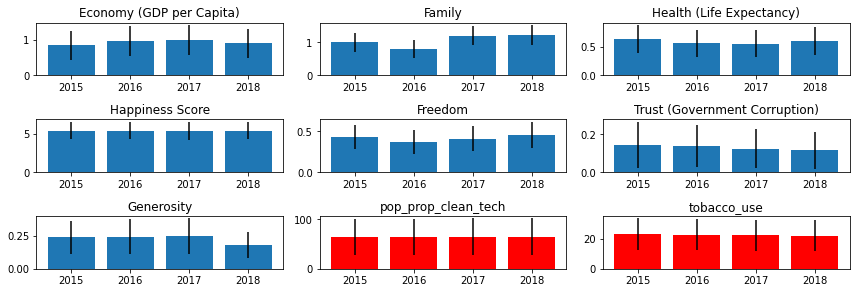

In [61]:
# Make plot of all numerical data across years within happiness
plt.figure(figsize=(12,12))
for i,f in enumerate(features):
    plt.subplot(9, 3, i + 1)
    plt.bar(x=pivot_year.index.tolist(), height=pivot_year['mean'][f], yerr=pivot_year['std'][f], 
            tick_label=pivot_year.index.tolist())
    plt.title(f)
plt.tight_layout()

targets = ['pop_prop_clean_tech', 'tobacco_use']
for i,t in enumerate(targets):
    plt.subplot(9, 3, 8 + i)
    plt.bar(x=pivot_c_t.index.tolist(), height=pivot_c_t['mean'][t], yerr=pivot_c_t['std'][t], 
            tick_label=pivot_c_t.index.tolist(), color='r')
    plt.title(t)
plt.tight_layout()
plt.savefig('./figures/feat_bar.png', bbox_inches='tight', dpi=300)

In [62]:
merge_subset = final_df.drop(columns=['index', 'Happiness Rank', 'year'])
order = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Happiness Score',
            'Freedom', 'Trust (Government Corruption)', 'Generosity', 'pop_prop_clean_tech', 'tobacco_use']
merge_subset = merge_subset[order]

<Figure size 432x288 with 0 Axes>

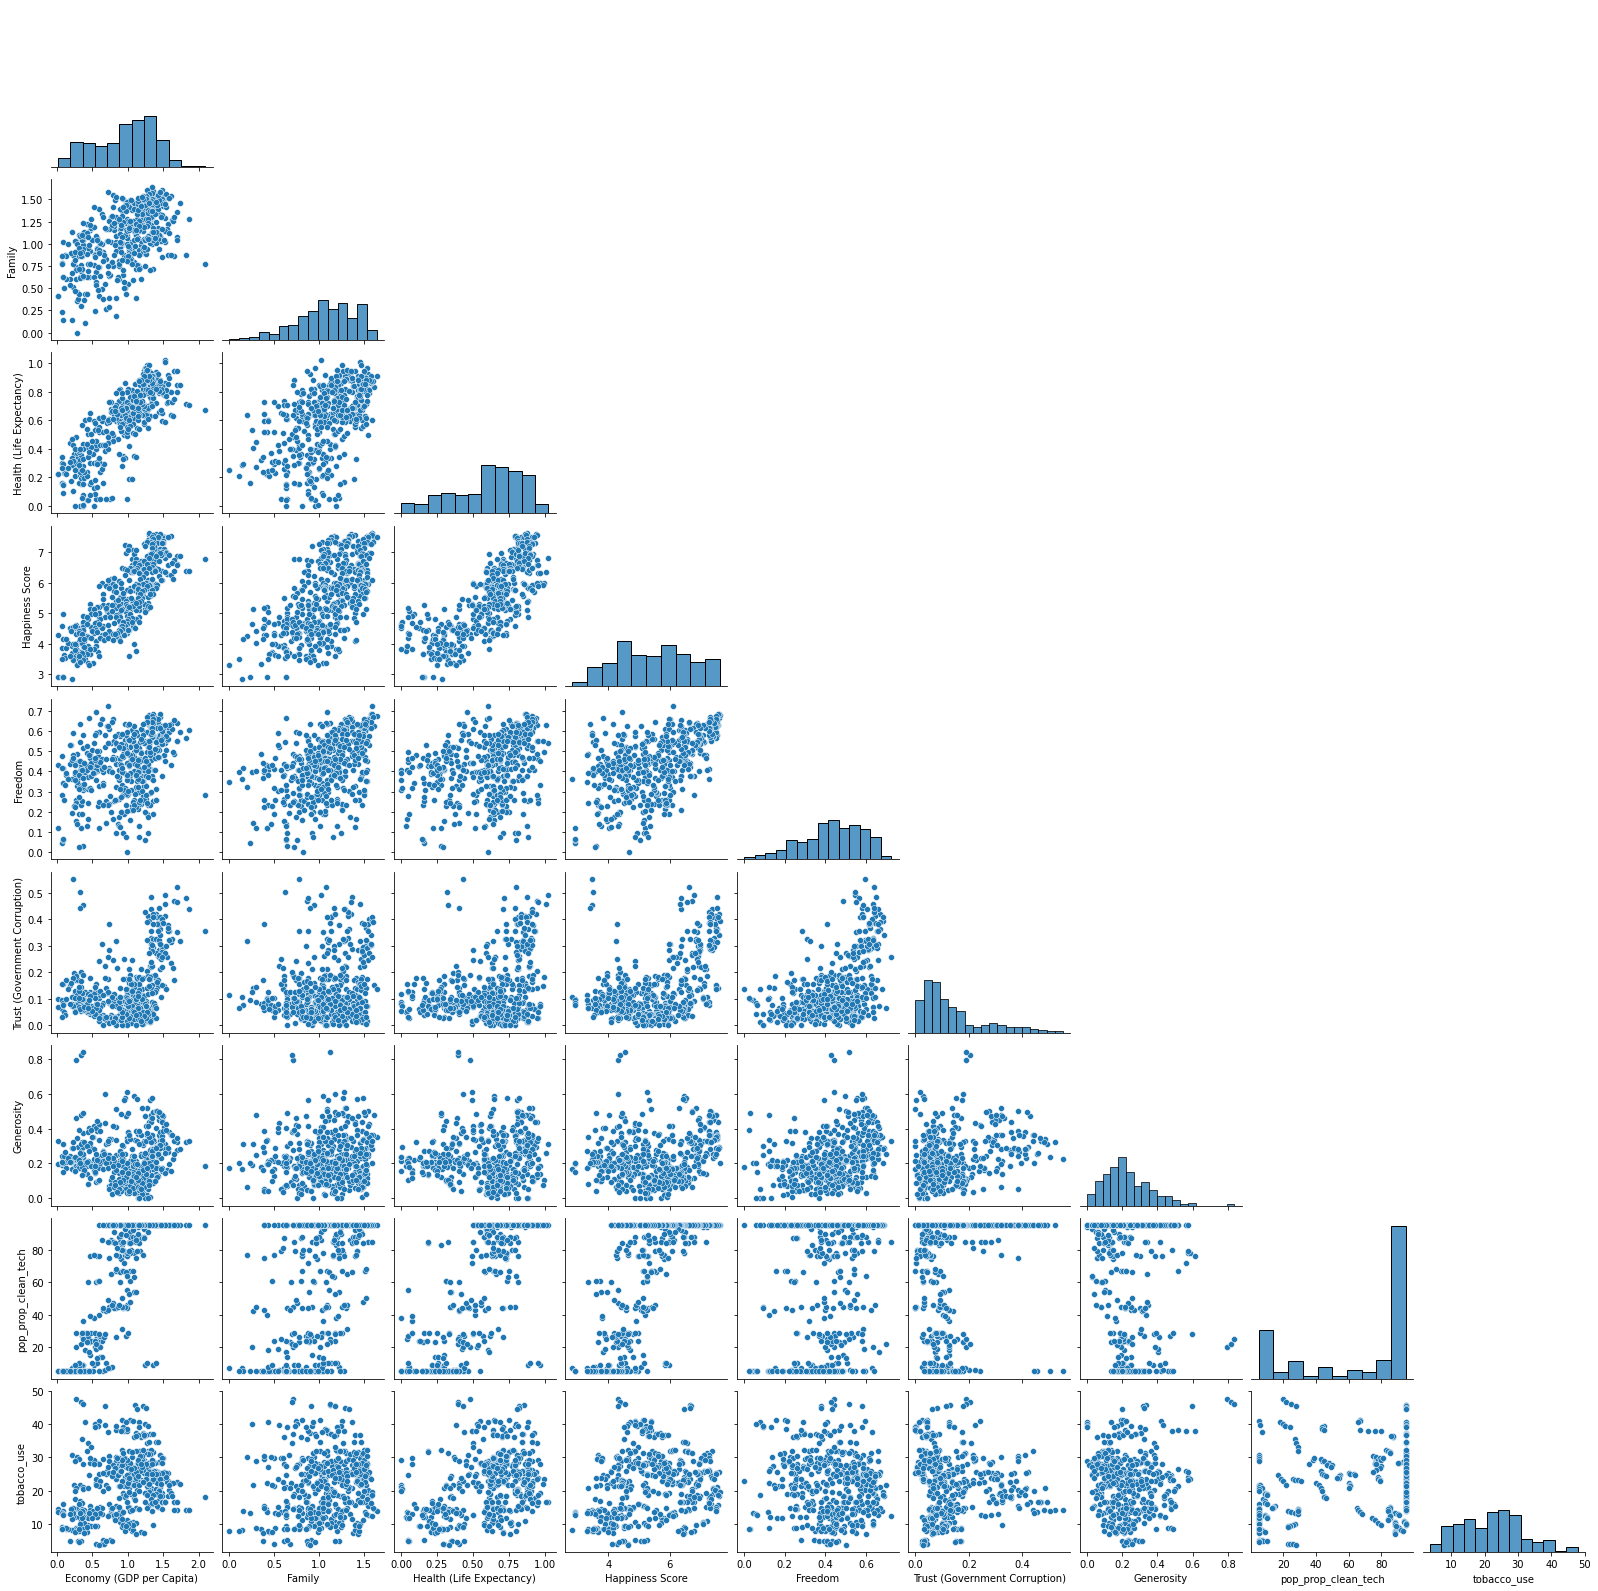

In [63]:
plt.figure()
seaborn.pairplot(merge_subset, vars=order, corner=True)
plt.savefig('./figures/pair_plot.png', bbox_inches='tight', dpi=300)

In [64]:
corr_res = merge_subset.corr()
corr_res

,Economy (GDP per Capita),Family,Health (Life Expectancy),Happiness Score,Freedom,Trust (Government Corruption),Generosity,pop_prop_clean_tech,tobacco_use
Economy (GDP per Capita),1.000000,0.570730,0.813712,0.824093,0.352617,0.373960,0.019344,0.842986,0.312443
Family,0.570730,1.000000,0.516058,0.637685,0.481257,0.174057,0.058619,0.543007,0.151838
Health (Life Expectancy),0.813712,0.516058,1.000000,0.780405,0.338016,0.298673,0.059696,0.791581,0.384736
Happiness Score,0.824093,0.637685,0.780405,1.000000,0.516638,0.450429,0.188425,0.742907,0.155141
Freedom,0.352617,0.481257,0.338016,0.516638,1.000000,0.503546,0.334231,0.229037,-0.115427
Trust (Government Corruption),0.373960,0.174057,0.298673,0.450429,0.503546,1.000000,0.293512,0.209424,-0.096569
Generosity,0.019344,0.058619,0.059696,0.188425,0.334231,0.293512,1.000000,-0.130648,0.024002
pop_prop_clean_tech,0.842986,0.543007,0.791581,0.742907,0.229037,0.209424,-0.130648,1.000000,0.341185
tobacco_use,0.312443,0.151838,0.384736,0.155141,-0.115427,-0.096569,0.024002,0.341185,1.000000


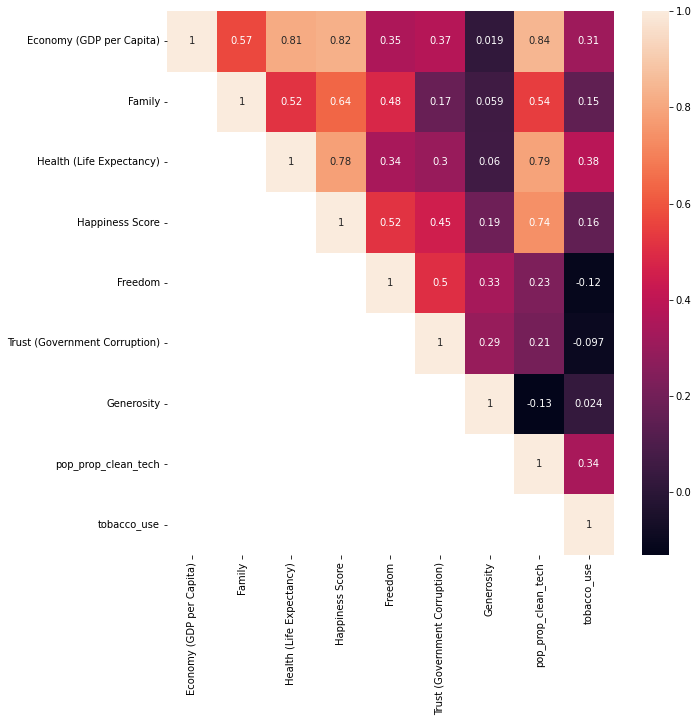

In [65]:
plt.figure(figsize=(10,10))
diag_mask = np.tril(corr_res, k=-1)
seaborn.heatmap(corr_res, mask=diag_mask, annot=True)
plt.savefig('./figures/l_diag_filt__corr_heatmap.png', bbox_inches='tight', dpi=300)

## Step 3:  Identify 1-3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well. 

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.



<a id="research_q"></a>
## Research Questions
1. Can a simple  linear  regression  using  the features found  in the world happiness  dataset provide  reasonable  prediction  on tobacco age use and/or  clean technology  and fuel  access for a given country?
2. Can k-means identify  meaningful  clusters  in the world happiness dataset?
3. Using  those clusters,  can we build  multiple  smaller linear regressions  that can improve upon  the prediction  accuracy in question  1?

## Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?  Use _matplotlib_ visualizations to present these findings.


__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


In [66]:
#EXPAND THIS SECTION TO PRESENT YOUR FINDINGS

<a id="findings"></a>
## Findings

<a id="lims_and_assumptions"></a>
### Limitations and Assumptions

Limitations for this analysis involve the lack of data for all countries. While there were more countries in both datasets, there were distinctions about regions of the Congo, for instance, that made it difficult to consoldate the data and use.

One of the largest assumptions this analysis makes is that countries have linear behavior over the course of years with extremely variable factors such as economy, happiness, and trust. Any number of real life events could greatly affect those factors in a non linear fashion and provide unreliable predictions for tobacco age use and access to clean technology and fuel. One such instance could be the election of a corrupt government, a revolution to overthrow a corrupt government, or a global pandemic. The data used in this analysis only covers up to 2018, but there is no reason to expect that the models developed in this analysis would be valid for 2020 and 2021 due to the impact of covid-19.

Another assumption is that the happiness features have some real relationship instead of spurious correlations to the choosen targets (tobacco age use and clean technology and fuel access).

Finally, the last assumption made is that a linear regression is appropriate for the data. As was shown in the EDA, the clean technology and fuel access dataset is not well distributed and is mostly skewed to the extremes, making a linear regression unlikely to work well. As for tobacco use, there are some factors that might hold some predictive power such as life expectancy and economy, but that relationship does not have to be linear either.

<a id="q1"></a>
### Question 1

#### Methods
In order to test out how linear regression worked on predicting the targets (tobacco age use and proportion of population with access to clean technology and fuel), the data was split into a training and test set. Approximately 75% of the data was used for training while the remainder of the data was set aside for testing. The training data was then scaled to zero mean and unit standard deviation and was fit with a linear regression. The test set was transformed using the fitted mean and standard deviation found on the training set. Once the test set was scaled, the linear regression was applied to try and predict the test set targets. The mean standard error (MSE) and r^2 were examined to evaluate the quality of fit as well as a scatter of true and predicted values plotted against index.

#### Results/Discussion
Based on the table below, it is not entirely clear which target had a better linear fit. The clean technology and fuel access has a much higher MSE compared to tobacco age use for both the training and testing set. On the other hand, tobacco age use has a much better r^2 value for both the training and testing set. In order to explore this further, I plotted the true and predicted values against an index to see how close the predicted values were (see scatter plot below). The scatter plot verified the results found in the exploratory data analysis that the clean technology and fuel access dataset is heavily skewed towards the edges (ie: 95% and 5%) and resulted in the mean squared error being much higher. The tobacco age use dataset did not have as large of a range and thus the mean squared error was lower. In summary, it does not seem like treating all the countries the same was a good idea to try and predict either target. In the next section, we will see if we can find insightful clusters that might yield better linear fits.

|target|Train MSE|Train R2|Test MSE|Test r2|
|:-:|:-:|:-:|:-:|:-:|
|Clean Technology and Fuel|274.6|0.777750|280.4|0.795454
|Tobacco Use|57.2|0.273804|72.5|0.294087|

![all_both_targets.png](./figures/all_both_targets.png)

<a id="q2"></a>
### Question 2
#### Methods
Using the same training and test sets in question 1, k-means clustering was applied to all the features to try and find insightful clusters of countries. To find the ideal number of clusters, k-means was ran 20 times, ranging from one cluster to 20 clusters and evaluated on the following three metrics: training within-cluster sum of squared error (wsse), test wsse, and the training inertia. Once the ideal cluster number was found, all of the countries were assigned their cluster number from both the training and testing set and visualized on the world map using Folium.

#### Results/Discussion

After evaluating the train and test WSSE as well as the inertia, there is an evident bend in all three graphs around five clusters. When there are more than five clusters, the improvement from adding more clusters is fairly small. 

All of the countries in the dataset were then visualized on the world map to establish a visual baseline for total countries in the dataset and the counts for each country. Most countries were found with four counts with a few exceptions, notably in Africa and South America. The first cluster only contains countries from Africa. The other cluster that also contains a large portion of countries from Africa is cluster four, which also contains portions of the Middle East and India. Cluster one and four seem to be capturing countries with lower economic strength and trust in government.

Cluster two and five seem to have some overlap of countries with some appearing in both. As mentioned in the question 1 results and discussion, this highlights how treating a country the same across multiple years is not a safe assumption. Countries can either progress or regress depending on their economy and government. These clusters seem to capture moderately wealthy to wealthy countries with a range of governments with a bias to more corrupt governments (ie: Mexico, Russia, China, and Brazil). Interestingly, Spain, France, Italy, and some of the Scandinivian countries also fell within cluster two. A closer look at their stability and economic strength would be needed to further understand their relation to the other countries within the same cluster to see if their placement was valid.

Finally, cluster three contains primarily wealthy, democratic countries including the United Staes, Canada, the United Kingdom, Finland, Sweden, Norway, Iceland, Austrilia, and New Zealand. This cluster also contains Mexico and Brazil which have an interesting political history over the past few years.

Overall, the clusters found within the data seem to be inisghtful and might help build better linear models in question three.

##### K-means: Idenitification of Needed Clusters
![k_means_cluster_analysis.png](./figures/k_means_cluster_analysis.png)
##### Baseline Country Visualization
![all_countries.png](./figures/all_countries.png)
##### Cluster 1
![cluster_1.png](./figures/cluster_1.png)
##### Cluster 2 
![cluster_2.png](./figures/cluster_2.png)
##### Cluster 3
![cluster_3.png](./figures/cluster_3.png)
##### Cluster 4
![cluster_4.png](./figures/cluster_4.png)
##### Cluster 5
![cluster_5.png](./figures/cluster_5.png)

<a id="q3"></a>
### Question 3

#### Methods
K-means was trained on the training set from questions 1 and 2 with k=5. Once the model was trained, the test set was predicted to determine how the test set would have been clustered into the 5 clusters. The training and testing sets were then separated into 5 partitions where each partition contained the observations in that cluster. The train partition for a given cluster was then fit with a linear regression. Once the linear regression was fit, the test partition was predicted and the process was repeated for the next cluster. As in question 1, MSE and r^2 was collected for both train and test set for each cluster to evaluate performance. The test set was then visualized by plotting the true and predicted values from the test set against the index for each cluster.


#### Results/Discussion
Almost all clusters had a lower training and testing MSE than the model using all countries combined for both targets. The r^2 measure yielded mixed results on improvement for both targets with some clusters having a better r^2 than the all country model. Overall, upon examining the plots of true and predicted values against index, it seemed that the predicted values for the clusters were closer to the true values in comparison to the all country model. This verifies the observation that the MSE values for the clusters were lower.

Overall, the r^2 measure indicates that a linear fit is not necessarily a good model for prediction of tobacco age use nor the proportion of the population that have access to clean technology and fuel. However, it does appear that the cluster analysis paired with the linear regression provided a model with lower prediction error overall.

Another interesting observation that came out of this analysis was that the cluster analysis managed to group countries with similiar proportions in the clean technology and fuel dataset. The clusters grouped together observations of similiar magnitude indicating that the clusters provide further insight into the targets on their own regardless of how the linear regression performed.

In summary, it appears that the cluster analysis provides further insights into the targets than a simple linear regression would have provided on all of the countries together. Combining linear regression with the clusters found reduces the overall error from the linear fit but does not necessarily make the linear model the best choice for model selection.

|model|target|Train MSE|Train R2|Test MSE|Test r2|
|:-:|:-:|:-:|:-:|:-:|:-:|
|all countries|Clean Technology and Fuel|274.6|0.777750|280.4|0.795454|
|all countries|Tobacco Use|57.2|0.273804|72.5|0.294087|
|cluster 1|Clean Technology and Fuel|82.2|0.707376|229.1|-0.051600|
|cluster 1|Tobacco Use|23.7|0.402277|37.2|0.234705|
|cluster 2|Clean Technology and Fuel|185.0|0.188481|250.6|0.284429|
|cluster 2|Tobacco Use|48.5|0.234353|53.4|0.307878|
|cluster 3|Clean Technology and Fuel|1.5|0.301348|0.9|0.000000|
|cluster 3|Tobacco Use|24.2|0.138839|34.3|0.095222|
|cluster 4|Clean Technology and Fuel|160.6|0.873824|394.1|0.392517|
|cluster 4|Tobacco Use|71.8|0.270805|106.0|0.386609|
|cluster 5|Clean Technology and Fuel|184.4|0.580504|277.9|0.416446|
|cluster 5|Tobacco Use|36.4|0.618451|33.8|0.626026|


##### Clean Technology and Fuel Access True and Prediction against Index  
![ctf_scatter_across_models.png](./figures/ctf_scatter_across_models.png)  
##### Tobacco Age Use True and Prediction against Index  
![tobacco_use.png](./figures/tobacco_use.png)  

<a id="q1_c"></a>
### Question 1 Code
* Can a simple linear regression using the features found in the world happiness dataset provide reasonable prediction on tobacco age use and/or clean technology and fuel access for a given country?

In [67]:
# Create training and testing sets
seed = 0
print(f'Numerical feautures:\n{features}\nTargets:\n{targets}')
# Isolate out targets from final dataframe
y1 = final_df[targets[0]]
y2 = final_df[targets[1]]

# Split merged dataset into train and test sets and first target
x_train, x_test, y1_train, y1_test = train_test_split(final_df, y1, test_size=0.25, random_state=seed)

# Isolate out country, year, and index for later cluster analysis
train_meta = x_train[['Country', 'year', 'CountryCode']]
test_meta = x_test[['Country', 'year', 'CountryCode']]

# Restrict train and test set to only have the planned numerical features for training
x_train = x_train[features]
x_test = x_test[features]

# Split up second target into the same train and test sets
# Dont need to split out x since seed is set
_, _, y2_train, y2_test = train_test_split(final_df, y2, test_size=0.25, random_state=seed)

Numerical feautures:
['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Happiness Score', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
Targets:
['pop_prop_clean_tech', 'tobacco_use']


In [68]:
# Create dataframe to store results of linear regression across tests
res_headers = ['model', 'target', 'train_mse', 'train_r2', 'test_mse', 'test_r2']
reg_res = pd.DataFrame(columns=res_headers)
scatter_res = {}

In [69]:
def scale_train_test(x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)
    return scaler.transform(x_train), scaler.transform(x_test)

In [70]:
def fit_predict_lin(x, y):
    regressor = LinearRegression()
    regressor.fit(x, y)
    pred = regressor.predict(x)
    mse = mean_squared_error(y_true = y, y_pred = pred)
    r2 = r2_score(y, pred)
    return regressor, mse, r2

In [71]:
def predict_test(regressor, x, y):
    pred = regressor.predict(x)
    mse = mean_squared_error(y_true = y, y_pred = pred)
    r2 = r2_score(y, pred)
    return pred, mse, r2

In [72]:
def make_scatter_dict(model, y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return {model: {'i': list(range(0, len(y_true))), 'true': y_true, 'pred': y_pred}}

In [73]:
x_train_scaled, x_test_scaled = scale_train_test(x_train, x_test)

In [74]:
# Set up and train regressor for y1 (clean tech)
regressor, train_mse, train_r2 = fit_predict_lin(x_train_scaled, y1_train)
print(f"MSE: {train_mse}\nr2: {train_r2}")

# Apply to test set for y1 (clean tech)
y1_test_pred, test_mse, test_r2 = predict_test(regressor, x_test_scaled, y1_test)
print(f"MSE: {test_mse}\nr2: {test_r2}")

# Store results
res = pd.DataFrame(
        [['all', 'clean_tech', train_mse, train_r2, test_mse, test_r2]], 
        columns=res_headers
        )
reg_res = reg_res.append(res)
# Add the scatter data for plots
a = make_scatter_dict('all', y1_test, y1_test_pred)
scatter_res['clean_tech'] = a

MSE: 274.6312872606815
r2: 0.7777502145577241
MSE: 280.43640516110213
r2: 0.7954536555794458


In [75]:
# Set up and train regressor for y2 (tobacco use)
regressor, train_mse, train_r2 = fit_predict_lin(x_train_scaled, y2_train)

# Apply to test set for y1 (clean tech)
y2_test_pred, test_mse, test_r2 = predict_test(regressor, x_test_scaled, y2_test)

# Store results
res = pd.DataFrame(
        [['all', 'tobacco_use', train_mse, train_r2, test_mse, test_r2]], 
        columns=res_headers
        )
reg_res = reg_res.append(res)
reg_res
# Add the scatter data for plots
a = make_scatter_dict('all', y2_test, y2_test_pred)
scatter_res['tobacco_use'] = a

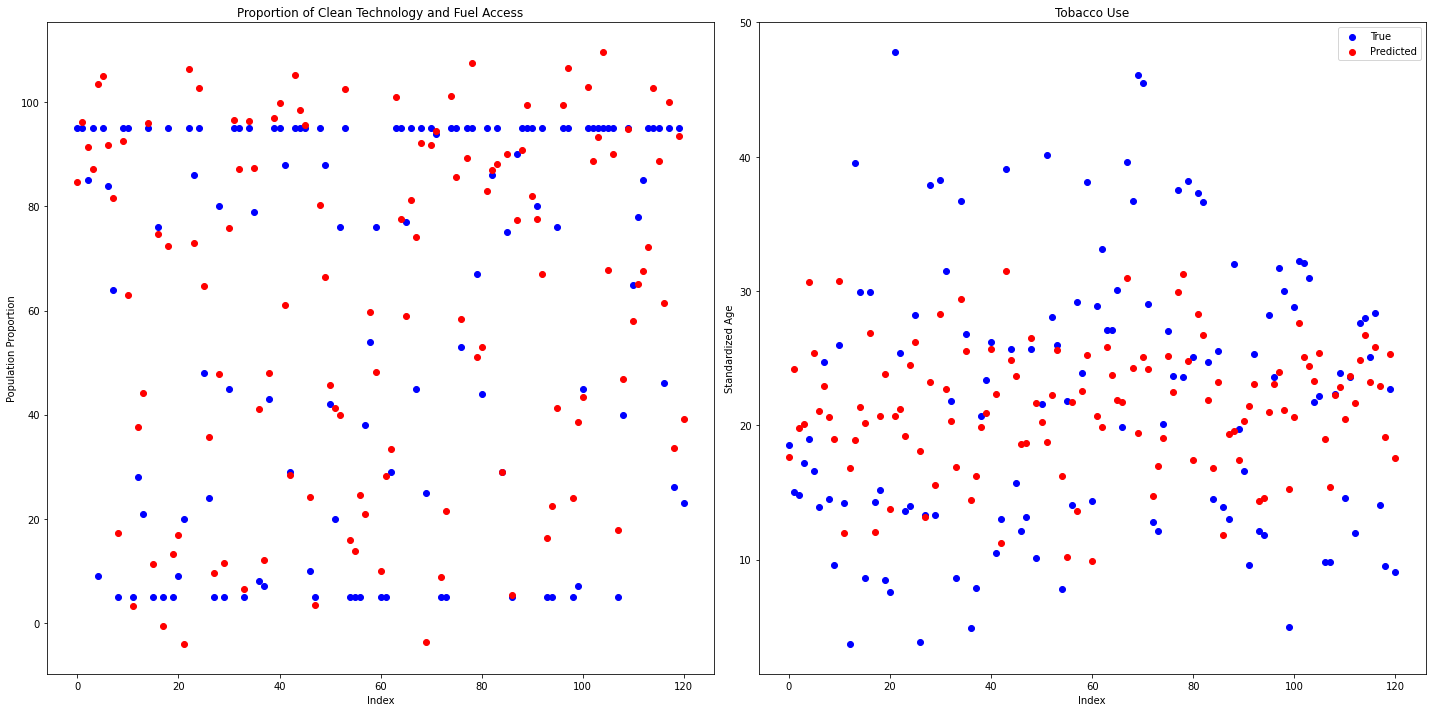

In [76]:
plt.figure(figsize=(20,10))
# Make plots for clean tech (y1)
for i, (model_name, model_values) in enumerate(scatter_res['clean_tech'].items()):
    plt.subplot(1, 2, 1)
    x = model_values['i']
    plt.scatter(x, model_values['true'], c='b')
    plt.scatter(x, model_values['pred'], c='r')
    plt.xlabel('Index')
    plt.ylabel('Population Proportion')
plt.tight_layout()
plt.title('Proportion of Clean Technology and Fuel Access')

# Make plots for Tobacco Use (y2)
for i, (model_name, model_values) in enumerate(scatter_res['tobacco_use'].items()):
    plt.subplot(1, 2, 2)
    x = model_values['i']
    plt.scatter(x, model_values['true'], c='b', label='True')
    plt.scatter(x, model_values['pred'], c='r', label='Predicted')
    plt.xlabel('Index')
    plt.ylabel('Standardized Age')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.title('Tobacco Use')
plt.savefig('./figures/all_both_targets.png', bbox_inches='tight', dpi=300)

<a id="q2_c"></a>
### Question 2
* Can k-means identify meaningful clusters in the world happiness dataset?

In [77]:
def calc_wsse(k_model, input_matr):
    return -1 * k_model.score(input_matr) / input_matr.shape[0]

In [78]:
# Test out multiple clusters to find ideal number of clusters
train_wsse = np.full((20, 1), np.nan)
test_wsse =  np.full((20, 1), np.nan)
train_inertia = np.full((20, 1), np.nan)
for i, k in enumerate(range(1,21)):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans = kmeans.fit(x_train)
    train_inertia[i] = kmeans.inertia_
    train_wsse[i] = calc_wsse(kmeans, x_train)
    test_wsse[i] = calc_wsse(kmeans, x_test)

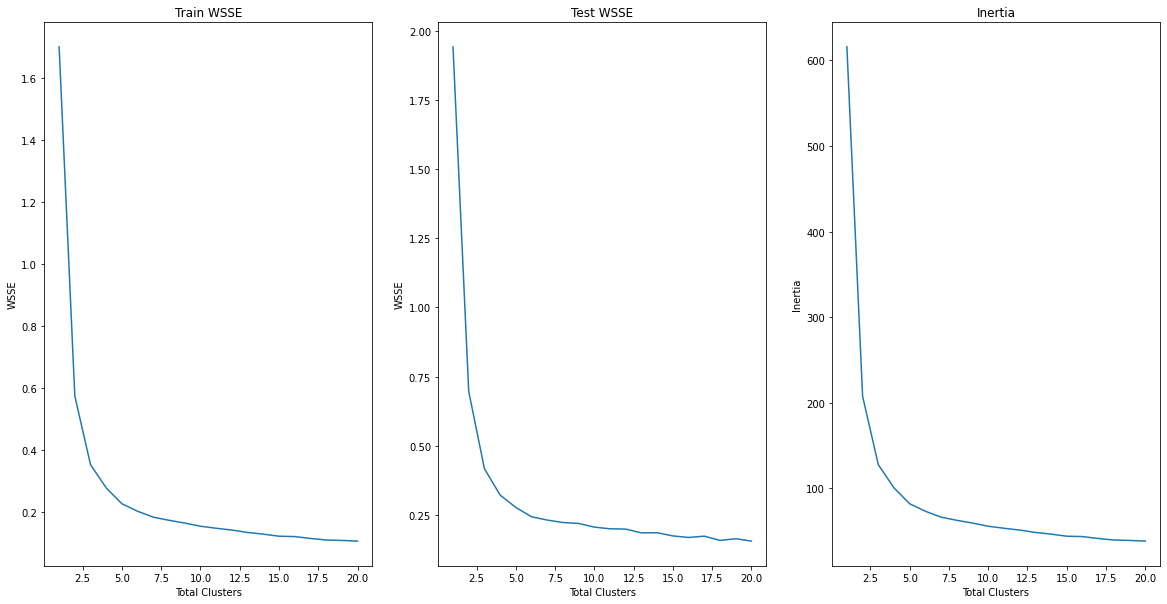

In [79]:
# Plot metrics from testing out multiple clusters

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.plot(list(range(1,21)), train_wsse)
plt.title('Train WSSE')
plt.xlabel('Total Clusters')
plt.ylabel('WSSE')
plt.subplot(1,3,2)
plt.plot(list(range(1,21)), test_wsse)
plt.title('Test WSSE')
plt.xlabel('Total Clusters')
plt.ylabel('WSSE')
# plt.savefig('./figures/k_means_wsse.png', bbox_inches='tight', dpi=3000)

# plt.figure()
plt.subplot(1,3,3)
plt.plot(list(range(1,21)), train_inertia)
plt.title('Inertia')
plt.xlabel('Total Clusters')
plt.ylabel('Inertia')
plt.savefig('./figures/k_means_cluster_analysis.png', bbox_inches='tight', dpi=300)

In [80]:
# 5 clusters seems like a good point. Time to explore the isolated clusters
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans = kmeans.fit(x_train)
train_inertia = kmeans.inertia_
train_wsse = calc_wsse(kmeans, x_train)
test_wsse = calc_wsse(kmeans, x_test)

### CLuster Analysis
Based on the above graphs, it is clear that 5 clusters seems like a 

In [81]:
def organize_clusters_(cluster_labels, label_meta, is_train):
    res = pd.DataFrame()
    
    if is_train:
        dataset_type = 'Train'
    else:
        dataset_type = 'Test'

    unique_c = np.unique(cluster_labels)
    for l_i, l in enumerate(unique_c):
        i = np.where(cluster_labels==l)
        c_info = label_meta.iloc[i]
        c_info = c_info.assign(cluster=np.full((c_info.shape[0], 1), l))
        c_info = c_info.assign(dataset_type=np.full((c_info.shape[0], 1), dataset_type))
        res = res.append(c_info)

    return res

In [82]:
# Train k-means with ideal cluster number
kmeans = KMeans(n_clusters=5, random_state=seed)
train_clusters = kmeans.fit_predict(x_train)
cluster_identity, counts = np.unique(train_clusters, return_counts=True)
print(np.vstack([cluster_identity, counts]))
train_res = organize_clusters_(train_clusters, train_meta, True)

# Apply k-means model to test set to idenify cluster identity of those countries
test_clusters = kmeans.predict(x_test)
test_res = organize_clusters_(test_clusters, test_meta, False)

# Combine train and test prediction results
country_clusters = pd.concat([train_res, test_res], join='inner')

[[ 0  1  2  3  4]
 [45 96 67 87 67]]


In [83]:
country_geo = 'world-countries.json'

In [84]:

a = country_clusters
country_counts = a.value_counts(subset='Country')
d = {'Country': country_counts.index, 'Value': country_counts.values}
plot_data = pd.DataFrame(data=d)
m = folium.Map(location=[0, 100], zoom_start=1.25)
folium.Choropleth(geo_data=country_geo, name='choropleth', 
             data=plot_data, columns=['Country', 'Value'], key_on='feature.properties.name').add_to(m)
m

In [85]:
c = 0
a = country_clusters[country_clusters.cluster == c]
country_counts = a.value_counts(subset='Country')
d = {'Country': country_counts.index, 'Value': country_counts.values}
plot_data = pd.DataFrame(data=d)
m = folium.Map(location=[0, 100], zoom_start=1.25)
folium.Choropleth(geo_data=country_geo, name='choropleth', 
             data=plot_data, columns=['Country', 'Value'], key_on='feature.properties.name').add_to(m)
m

In [86]:
c = 1
a = country_clusters[country_clusters.cluster == c]
country_counts = a.value_counts(subset='Country')
d = {'Country': country_counts.index, 'Value': country_counts.values}
plot_data = pd.DataFrame(data=d)
m = folium.Map(location=[0, 100], zoom_start=1.25)
folium.Choropleth(geo_data=country_geo, name='choropleth', 
             data=plot_data, columns=['Country', 'Value'], key_on='feature.properties.name').add_to(m)
m

In [87]:
c = 2
a = country_clusters[country_clusters.cluster == c]
country_counts = a.value_counts(subset='Country')
d = {'Country': country_counts.index, 'Value': country_counts.values}
plot_data = pd.DataFrame(data=d)
m = folium.Map(location=[0, 100], zoom_start=1.25)
folium.Choropleth(geo_data=country_geo, name='choropleth', 
             data=plot_data, columns=['Country', 'Value'], key_on='feature.properties.name').add_to(m)
m

In [88]:
c = 3
a = country_clusters[country_clusters.cluster == c]
country_counts = a.value_counts(subset='Country')
d = {'Country': country_counts.index, 'Value': country_counts.values}
plot_data = pd.DataFrame(data=d)
m = folium.Map(location=[0, 100], zoom_start=1.25)
folium.Choropleth(geo_data=country_geo, name='choropleth', 
             data=plot_data, columns=['Country', 'Value'], key_on='feature.properties.name').add_to(m)
m

In [89]:
c = 4
a = country_clusters[country_clusters.cluster == c]
country_counts = a.value_counts(subset='Country')
d = {'Country': country_counts.index, 'Value': country_counts.values}
plot_data = pd.DataFrame(data=d)
m = folium.Map(location=[0, 100], zoom_start=1.25)
folium.Choropleth(geo_data=country_geo, name='choropleth', 
             data=plot_data, columns=['Country', 'Value'], key_on='feature.properties.name').add_to(m)
m

### Cluster Analysis
Very clear joint in the elbow at 5 for both train and test on the WSSE

<a id="q3_c"></a>
### Question 3
* Using  those clusters,  can we build  multiple  smaller linear regressions  that can improve upon  the prediction  accuracy in question  1?

In [90]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Set up and train regressor for y1 (clean tech)
regressor = LinearRegression()
regressor.fit(x_train_scaled, y1_train)
y1_train_pred = regressor.predict(x_train_scaled)
train_mse = mean_squared_error(y_true = y1_train, y_pred = y1_train_pred)
train_r2 = r2_score(y1_train, y1_train_pred)
print(f"MSE: {train_mse}\nr2: {train_r2}")

# Apply to test set for y1 (clean tech)
y1_test_pred = regressor.predict(x_test_scaled)
test_mse = mean_squared_error(y_true = y1_test, y_pred = y1_test_pred)
test_r2 = r2_score(y1_test, y1_test_pred)
print(f"MSE: {test_mse}\nr2: {test_r2}")

MSE: 274.6312872606815
r2: 0.7777502145577241
MSE: 280.43640516110213
r2: 0.7954536555794458


In [91]:
for c in cluster_identity:
    # Isolate out train countries
    train_countries = country_clusters[country_clusters.dataset_type == 'Train']
    train_countries = train_countries[train_countries.cluster == c]
    train_mask = train_meta[['Country','year']].isin(train_countries[['Country', 'year']]).any(axis=1)
    
    # Isolate out test countries
    test_countries = country_clusters[country_clusters.dataset_type == 'Test']
    test_countries = test_countries[test_countries.cluster == c]
    test_mask = test_meta[['Country','year']].isin(test_countries[['Country', 'year']]).any(axis=1)

    # Isolate train set
    x_sub_train = x_train[train_mask]
    y1_sub_train = y1_train[train_mask]
    y2_sub_train = y2_train[train_mask]

    # Isolate test set
    x_sub_test = x_test[test_mask]
    y1_sub_test = y1_test[test_mask]
    y2_sub_test = y2_test[test_mask]
 
    # Scale train and test
    x_train_scaled, x_test_scaled = scale_train_test(x_sub_train, x_sub_test)
    
    # Set up and train regressor for y1 (clean tech)
    regressor, train_mse, train_r2 = fit_predict_lin(x_train_scaled, y1_sub_train)

    # Apply to test set for y1 (clean tech)
    y1_test_pred, test_mse, test_r2 = predict_test(regressor, x_test_scaled, y1_sub_test)
    
    # Store results
    res = pd.DataFrame(
            [[c, 'clean_tech', train_mse, train_r2, test_mse, test_r2]], 
            columns=res_headers
            )
    reg_res = reg_res.append(res)
    # Add the scatter data for plots
    a = make_scatter_dict(c, y1_sub_test, y1_test_pred)
    scatter_res['clean_tech'].update(a)

    # Set up and train regressor for y1 (tobacco use)
    regressor, train_mse, train_r2 = fit_predict_lin(x_train_scaled, y2_sub_train)

    # Apply to test set for y1 (tobacco use)
    y2_test_pred, test_mse, test_r2 = predict_test(regressor, x_test_scaled, y2_sub_test)
    
    # Store results
    res = pd.DataFrame(
            [[c, 'tobacco_use', train_mse, train_r2, test_mse, test_r2]], 
            columns=res_headers
            )
    reg_res = reg_res.append(res)
    # Add the scatter data for plots
    a = make_scatter_dict(c, y2_sub_test, y2_test_pred)
    scatter_res['tobacco_use'].update(a)

reg_res

,model,target,train_mse,train_r2,test_mse,test_r2
0,all,clean_tech,274.631287,0.777750,280.436405,0.795454
0,all,tobacco_use,57.212999,0.273804,72.535337,0.294087
0,0,clean_tech,82.237595,0.707376,229.057978,-0.051600
0,0,tobacco_use,23.744413,0.402277,37.157833,0.234705
0,1,clean_tech,184.951481,0.188481,250.627219,0.284429
0,1,tobacco_use,48.519009,0.234353,53.359396,0.307878
0,2,clean_tech,1.518390,0.301348,0.863752,0.000000
0,2,tobacco_use,24.164821,0.138839,34.289779,0.095222
0,3,clean_tech,160.555932,0.873824,394.126058,0.392517
0,3,tobacco_use,71.776795,0.270805,105.957545,0.386609


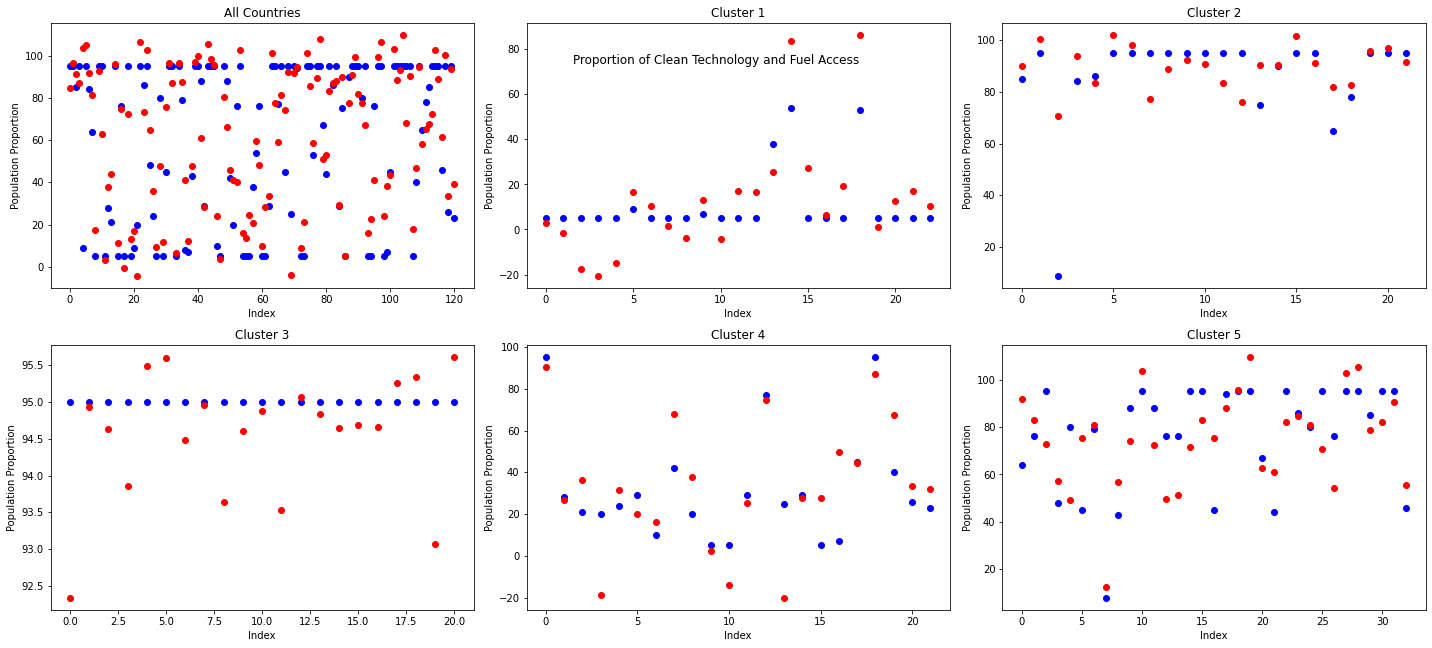

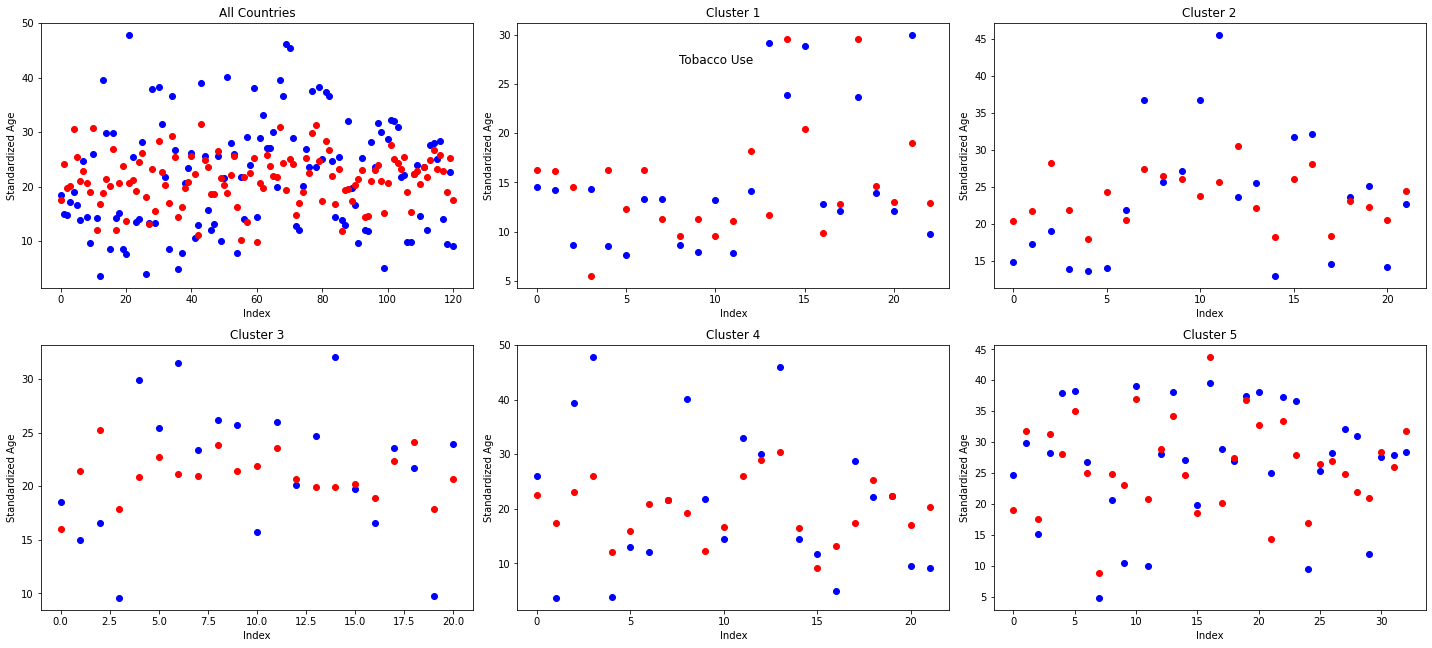

In [92]:
plt.figure(figsize=(20,40))
# Make plots for clean tech (y1)
for i, (model_name, model_values) in enumerate(scatter_res['clean_tech'].items()):
    plt.subplot(9, 3, i + 1)
    x = model_values['i']
    plt.scatter(x, model_values['true'], c='b')
    plt.scatter(x, model_values['pred'], c='r')
    plt.xlabel('Index')
    plt.ylabel('Population Proportion')
    if isinstance(model_name, str):
        plt.title('All Countries')
    else:
        plt.title(f'Cluster {model_name + 1}')
plt.tight_layout()
plt.suptitle('Proportion of Clean Technology and Fuel Access')
plt.savefig('./figures/ctf_scatter_across_models.png', bbox_inches='tight', dpi=300)

plt.figure(figsize=(20,40))
# Make plots for Tobacco Use (y2)
for i, (model_name, model_values) in enumerate(scatter_res['tobacco_use'].items()):
    plt.subplot(9, 3, i + 1)
    x = model_values['i']
    plt.scatter(x, model_values['true'], c='b')
    plt.scatter(x, model_values['pred'], c='r')
    plt.xlabel('Index')
    plt.ylabel('Standardized Age')
    if isinstance(model_name, str):
        plt.title('All Countries')
    else:
        plt.title(f'Cluster {model_name + 1}')
plt.tight_layout()
plt.suptitle('Tobacco Use')
plt.savefig('./figures/tobacco_use.png', bbox_inches='tight', dpi=300)